# Here, I will continue to train loaded models

In [21]:
import numpy as np
import tensorflow as tf

from tensorflow import keras
from keras import layers

import matplotlib.pyplot as plt

### Setting Up GPU as a training device

In [22]:
physical_devices = tf.config.list_physical_devices()

print(physical_devices)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [23]:
tf.config.set_visible_devices(physical_devices[1], 'GPU')

### Loading Data

In [24]:
N_TRAIN_EXAMPLES = 50000
N_TEST_EXAMPLES = 10000

CLASSES=10

In [25]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.cifar10.load_data()

import numpy as np
from sklearn.model_selection import train_test_split

# Concatenate train and test images
X = np.concatenate((X_train, X_test))
y = np.concatenate((Y_train, Y_test))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=N_TRAIN_EXAMPLES, test_size=N_TEST_EXAMPLES, random_state=1)

# Getting dummy variables
y_train_fixed = np.zeros((y_train.shape[0], 10))
y_test_fixed = np.zeros((y_test.shape[0], 10))

i = 0
for [val] in y_train:
  y_train_fixed[i][val] = 1
  i += 1
  
i = 0
for [val] in y_test:
  y_test_fixed[i][val] = 1
  i += 1

### Loading model

In [26]:
model = keras.models.load_model('models/cifar10_model_1.keras')

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 dropout_20 (Dropout)        (None, 32, 32, 64)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 dropout_21 (Dropout)        (None, 32, 32, 64)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 16, 16, 64)        102464    
                                                                 
 dropout_22 (Dropout)        (None, 16, 16, 64)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)        

In [27]:
optimizer = keras.optimizers.Adam()
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [28]:
%%time
batch_size = 256
epochs = 20
validation_split = 0.2
history = model.fit(X_train, y_train_fixed, batch_size=batch_size, epochs=epochs, validation_split=validation_split)

Epoch 1/20
157/157 [==============================] - 21s 131ms/step - loss: 0.7223 - accuracy: 0.7424 - val_loss: 0.8919 - val_accuracy: 0.7000
Epoch 2/20
157/157 [==============================] - 76s 485ms/step - loss: 0.6794 - accuracy: 0.7603 - val_loss: 0.8506 - val_accuracy: 0.7087
Epoch 3/20
157/157 [==============================] - 15s 98ms/step - loss: 0.6652 - accuracy: 0.7632 - val_loss: 0.8500 - val_accuracy: 0.7123
Epoch 4/20
157/157 [==============================] - 25s 161ms/step - loss: 0.6291 - accuracy: 0.7763 - val_loss: 0.8590 - val_accuracy: 0.7125
Epoch 5/20
157/157 [==============================] - 21s 134ms/step - loss: 0.6087 - accuracy: 0.7822 - val_loss: 0.8419 - val_accuracy: 0.7155
Epoch 6/20
157/157 [==============================] - 18s 117ms/step - loss: 0.5934 - accuracy: 0.7897 - val_loss: 0.8416 - val_accuracy: 0.7205
Epoch 7/20
157/157 [==============================] - 22s 139ms/step - loss: 0.5611 - accuracy: 0.8013 - val_loss: 0.8561 - val_acc

In [34]:
# Evaluate the model

loss, score = model.evaluate(X_test, y_test_fixed)

print(loss, score)

313/313 [==============================] - 2s 5ms/step - loss: 0.8664 - accuracy: 0.7323
0.8664315342903137 0.7322999835014343


### Save model to file

In [29]:
model.save("models/cifar10_model_2.keras")

Text(0.5, 1.0, 'Loss Curves')

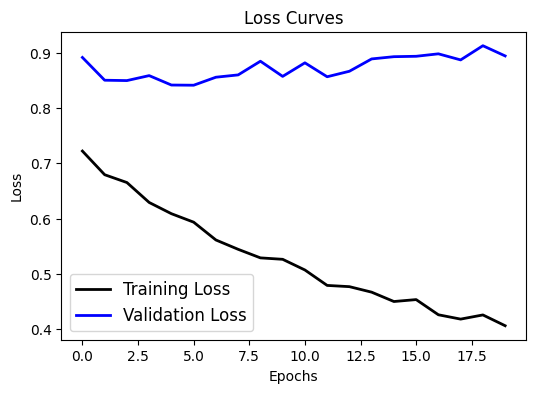

In [30]:
# Plotting the loss curve
plt.figure(figsize=[6, 4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'blue', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=12)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

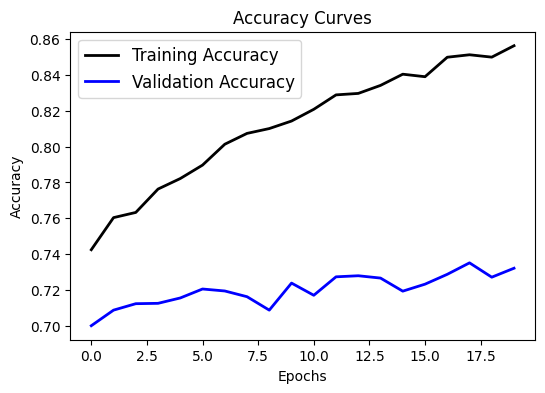

In [31]:
# Plotting the accuracy curve
plt.figure(figsize=[6, 4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=12)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)